Respondendo ao questionário 2 de Introdução A Ciência de Dados

In [7]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Questão 1 

![Alt text](image.png)

Extração e tratamento da tabela

In [25]:
url = urlopen("https://www.worldometers.info/world-population/population-by-country/")

bs = BeautifulSoup(url, "html.parser")

In [26]:
table = bs.find('table', {"id":"example2"})

In [27]:
df = pd.read_html(str(table))[0]

In [28]:
df = df.drop(columns=['#'])

In [29]:
df[df.columns[1]] = df[df.columns[1]].astype(str)
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]].str.replace(',', '.'), errors='coerce')
df

,Country (or dependency),Population (2023),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,India,1428627663,0.81 %,11454490,481,2973190,-486136,2.0,28.0,36 %,17.76 %
1,China,1425671352,-0.02 %,-215985,152,9388211,-310220,1.2,39.0,65 %,17.72 %
2,United States,339996563,0.50 %,1706706,37,9147420,999700,1.7,38.0,83 %,4.23 %
3,Indonesia,277534122,0.74 %,2032783,153,1811570,-49997,2.1,30.0,59 %,3.45 %
4,Pakistan,240485658,1.98 %,4660796,312,770880,-165988,3.3,21.0,35 %,2.99 %
...,...,...,...,...,...,...,...,...,...,...,...
229,Montserrat,4386,-0.09 %,-4,44,100,0,1.6,44.0,11 %,0.00 %
230,Falkland Islands,3791,0.29 %,11,0,12170,0,1.6,40.0,62 %,0.00 %
231,Niue,1935,0.05 %,1,7,260,0,2.4,36.0,41 %,0.00 %
232,Tokelau,1893,1.18 %,22,189,10,0,2.6,27.0,0 %,0.00 %


Cálculo da correlação

In [30]:
corr = df.corr()
corr

,Population (2023),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age
Population (2023),1.000000,0.621103,-0.025359,0.451759,-0.169378,-0.035498,-0.009930
Net Change,0.621103,1.000000,-0.032072,0.170999,-0.301581,0.268418,-0.284370
Density (P/Km²),-0.025359,-0.032072,1.000000,-0.059129,-0.003888,-0.119682,0.200981
Land Area (Km²),0.451759,0.170999,-0.059129,1.000000,0.087914,-0.021915,0.020464
Migrants (net),-0.169378,-0.301581,-0.003888,0.087914,1.000000,-0.057052,0.099523
Fert. Rate,-0.035498,0.268418,-0.119682,-0.021915,-0.057052,1.000000,-0.853667
Med. Age,-0.009930,-0.284370,0.200981,0.020464,0.099523,-0.853667,1.000000


Para melhor visualização

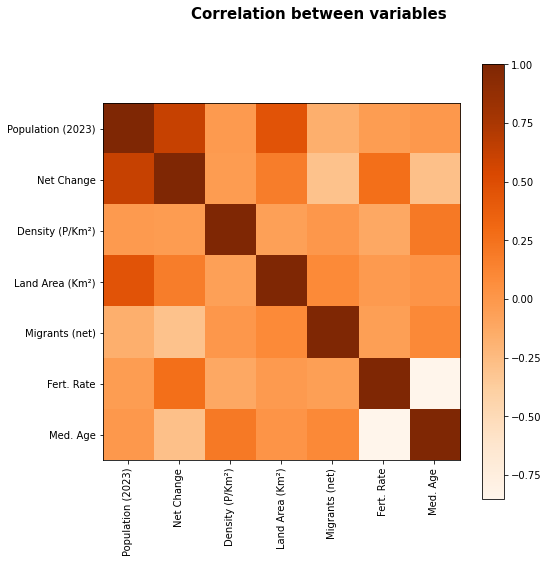

In [32]:
plt.figure(figsize=(8,8))
plt.imshow(corr, cmap="Oranges")
plt.colorbar()

plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

# Questão 2

![Alt text](image-1.png)

In [2]:
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"

df = pd.read_html(url)[0]

df = df.groupby("Country").median().reset_index()

In [3]:
df

,Country,Unnamed: 0,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,NaN,2007.5,57.80,284.0,81.0,0.010,17.029434,64.0,1794.0,15.45,111.5,58.0,8.19,0.10,321.199783,18.50,18.30,0.4240,8.55
1,Albania,NaN,2007.5,75.60,17.5,1.0,4.950,100.361243,98.0,8.5,52.15,1.0,98.0,5.94,0.10,1390.308084,1.60,1.65,0.7080,11.80
2,Algeria,NaN,2007.5,73.95,124.5,20.0,0.445,187.424821,94.5,109.5,50.80,23.5,94.5,3.84,0.10,3031.800100,6.00,5.90,0.6935,12.45
3,Angola,NaN,2007.5,48.45,367.0,85.5,6.095,35.946032,72.0,1322.5,18.50,135.5,52.0,3.84,2.50,1111.730143,8.55,8.55,0.4610,7.90
4,Antigua and Barbuda,NaN,2007.5,75.10,143.0,0.0,7.840,1027.575528,99.0,0.0,42.90,0.0,98.0,4.53,0.10,11650.644430,3.40,3.30,0.7795,13.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Uruguay,NaN,2007.5,76.25,118.5,1.0,6.120,419.696086,95.0,0.0,58.60,1.0,95.0,8.58,0.10,6079.627125,1.60,1.50,0.7650,15.50
152,Uzbekistan,NaN,2007.5,67.85,184.0,22.0,1.595,31.470115,99.0,50.0,37.80,25.5,99.0,5.49,0.20,460.927389,3.10,3.10,0.6375,11.80
153,Vanuatu,NaN,2007.5,71.10,151.0,0.0,0.895,339.892570,63.0,0.0,46.15,0.0,66.5,3.87,0.10,2139.900312,1.55,1.50,0.5805,10.70
154,Zambia,NaN,2007.5,56.55,364.5,31.5,2.370,59.916727,81.0,497.0,18.60,50.0,83.0,4.99,12.75,560.238080,6.85,6.75,0.4980,11.25


In [4]:
df = df.drop(df.columns[1], axis= 1)

In [5]:
df

,Country,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,2007.5,57.80,284.0,81.0,0.010,17.029434,64.0,1794.0,15.45,111.5,58.0,8.19,0.10,321.199783,18.50,18.30,0.4240,8.55
1,Albania,2007.5,75.60,17.5,1.0,4.950,100.361243,98.0,8.5,52.15,1.0,98.0,5.94,0.10,1390.308084,1.60,1.65,0.7080,11.80
2,Algeria,2007.5,73.95,124.5,20.0,0.445,187.424821,94.5,109.5,50.80,23.5,94.5,3.84,0.10,3031.800100,6.00,5.90,0.6935,12.45
3,Angola,2007.5,48.45,367.0,85.5,6.095,35.946032,72.0,1322.5,18.50,135.5,52.0,3.84,2.50,1111.730143,8.55,8.55,0.4610,7.90
4,Antigua and Barbuda,2007.5,75.10,143.0,0.0,7.840,1027.575528,99.0,0.0,42.90,0.0,98.0,4.53,0.10,11650.644430,3.40,3.30,0.7795,13.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Uruguay,2007.5,76.25,118.5,1.0,6.120,419.696086,95.0,0.0,58.60,1.0,95.0,8.58,0.10,6079.627125,1.60,1.50,0.7650,15.50
152,Uzbekistan,2007.5,67.85,184.0,22.0,1.595,31.470115,99.0,50.0,37.80,25.5,99.0,5.49,0.20,460.927389,3.10,3.10,0.6375,11.80
153,Vanuatu,2007.5,71.10,151.0,0.0,0.895,339.892570,63.0,0.0,46.15,0.0,66.5,3.87,0.10,2139.900312,1.55,1.50,0.5805,10.70
154,Zambia,2007.5,56.55,364.5,31.5,2.370,59.916727,81.0,497.0,18.60,50.0,83.0,4.99,12.75,560.238080,6.85,6.75,0.4980,11.25


In [11]:
analysis = df.loc[(df["Country"] == "Ireland") | (df["Country"] == "Finland") | (df["Country"] == "Zambia") | (df["Country"] == "Netherlands") | (df["Country"] == "Angola")]

<AxesSubplot:xlabel='Country', ylabel='Schooling'>

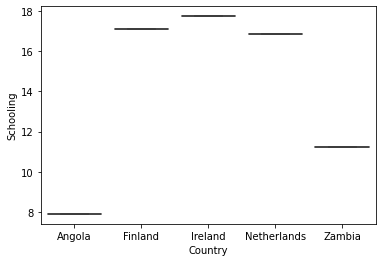

In [12]:
sns.boxplot(data= analysis, x = "Country", y = "Schooling")

# Questão 3

![Alt text](image-2.png)

In [31]:
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"

df = pd.read_html(url)[0]

In [20]:
df

,Unnamed: 0,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,NaN,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,NaN,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,NaN,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,NaN,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,NaN,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,NaN,Zimbabwe,Africa,2004,Developing,44.3,723,27,4.36,0.000000,...,67.0,7.13,65,33.6,454.366654,12777511,9.4,9.4,0.407,9.2
2457,NaN,Zimbabwe,Africa,2003,Developing,44.5,715,26,4.06,0.000000,...,7.0,6.52,68,36.7,453.351155,12633897,9.8,9.9,0.418,9.5
2458,NaN,Zimbabwe,Africa,2002,Developing,44.8,73,25,4.43,0.000000,...,73.0,6.53,71,39.8,57.348340,125525,1.2,1.3,0.427,10.0
2459,NaN,Zimbabwe,Africa,2001,Developing,45.3,686,25,1.72,0.000000,...,76.0,6.16,75,42.1,548.587312,12366165,1.6,1.7,0.427,9.8


In [32]:
df = df.drop(df.columns[0], axis=1)

In [33]:
df

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,68.0,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,Zimbabwe,Africa,2004,Developing,44.3,723,27,4.36,0.000000,68.0,...,67.0,7.13,65,33.6,454.366654,12777511,9.4,9.4,0.407,9.2
2457,Zimbabwe,Africa,2003,Developing,44.5,715,26,4.06,0.000000,7.0,...,7.0,6.52,68,36.7,453.351155,12633897,9.8,9.9,0.418,9.5
2458,Zimbabwe,Africa,2002,Developing,44.8,73,25,4.43,0.000000,73.0,...,73.0,6.53,71,39.8,57.348340,125525,1.2,1.3,0.427,10.0
2459,Zimbabwe,Africa,2001,Developing,45.3,686,25,1.72,0.000000,76.0,...,76.0,6.16,75,42.1,548.587312,12366165,1.6,1.7,0.427,9.8


In [34]:
selected_countries = ["Angola", "Netherlands", "Ireland", "Zambia", "Finland"]

analysis = df[(df["Country"].isin(selected_countries))]


C:\Users\davif\AppData\Local\Temp\ipykernel_6840\284700721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis["Year"] = pd.to_datetime(analysis["Year"], format='%Y')


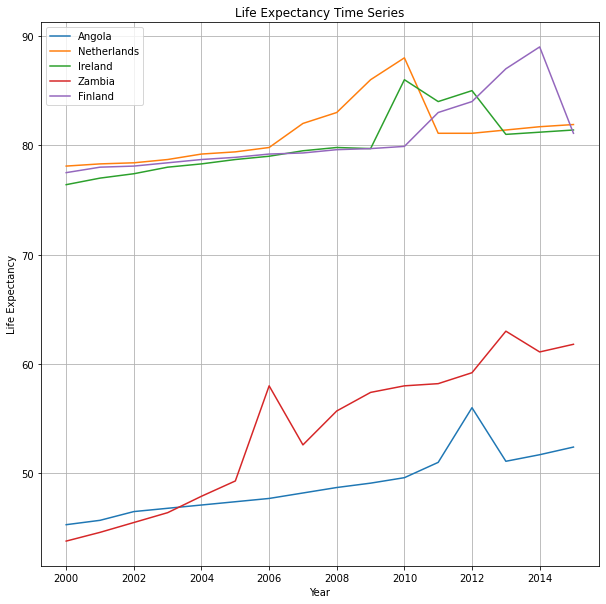

In [35]:
analysis["Year"] = pd.to_datetime(analysis["Year"], format='%Y')

analysis.set_index("Year", inplace=True)

plt.figure(figsize=(10,10))

for country in selected_countries:
    plt.plot(analysis.loc[analysis["Country"] == country, "Life_expectancy"], label=country)

plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Time Series")
plt.legend()
plt.grid(True)
plt.show()

# Questão 4

![Alt text](image-3.png)

In [38]:
print(np.mean(df["Life_expectancy"]), np.var(df["Life_expectancy"]))

69.46456724908573 92.87998791715574


Text(0, 0.5, 'Frequency')

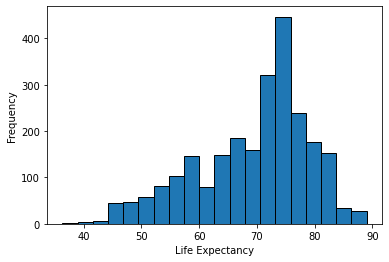

In [41]:
plt.hist(df["Life_expectancy"], bins=20, edgecolor="black")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")

# Questão 5

![Alt text](image-4.png)

In [42]:
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"

df = pd.read_html(url)[0]

Text(0.5, 1.0, 'Status geral')

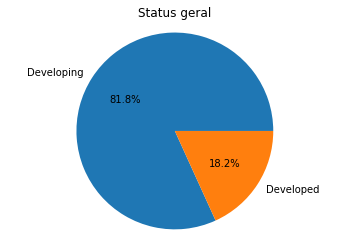

In [48]:
status = df["Status"].value_counts()

plt.pie(status, labels=status.index, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Status geral")